# Task 1 : Prediction using Supervised ML

## Submitted by - Pragya Pandey

### Linear Regression with Python Scikit Learn 

In this section we are going to explore how Scikit-Learn library for Machine Learning can be used for implementation of simple Linear Regression. 

## Simple Linear Regression

Here in the task we have to predict the percentage of marks of a student based on the number of hours he/she is sending on studies. 

In [2]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Reading the Student Scores dataset

score_d = pd.read_csv(r"C:\Users\NIDHI\Desktop\Projects\The-Sparks-Foundation\dataset.csv")

In [5]:
#Let's explore our dataset a bit. Execute the following code to check the shape of the dataset
score_d.shape


(25, 2)

#### Printing first ten records

In [6]:
# This head() retrieves the first 10 records from the dataset.
score_d.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
# To see the statistical details of the dataset, we can use describe()
score_d.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


###  Let's plot 2D graph to visualize the relationship between the two variables. 
##### We can create the plot with the following code

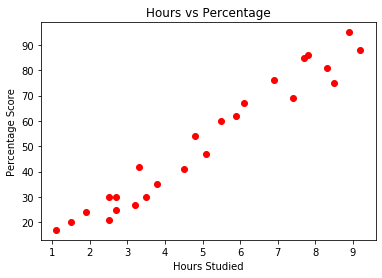

In [10]:
plt.plot(score_d['Hours'],score_d['Scores'],'ro')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

#### Preparing the dataset

In [11]:
# Here we can use iloc to assign the values of the variable in to X and y

X = score_d.iloc[:, :-1].values
y = score_d.iloc[:, 1].values

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
# The above code split 80% to the training dataset and 20% to the test dataset.
# test_size variable specifies the 80-20 proportion of the dataset

# we have completed our dataset splitting. Now we have to train our algorithm.


#### Training the Algorithm

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
print(regressor.intercept_)

2.018160041434683


In [16]:
print(regressor.coef_)

[9.91065648]


In [17]:
# If a student studies one hour more than previous studieh hours, 
# then the student can see the increase of the percentage scrore by 9.91.

# Plotting the scatterplot to visualize the intercept and slope

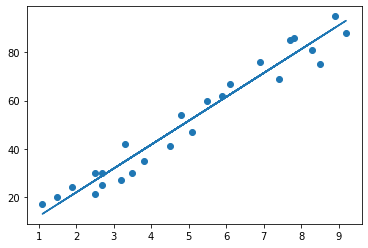

In [18]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

#### Prediction Making

In [19]:
# Now we can user oru test data to check how actually our trained algorithm predicted the score

# Execute the following code for prediction

In [20]:
y_pred = regressor.predict(X_test)

In [21]:
# y_pred predicts the value for the X_test series

# To compare the actual output values for X_test with the predicted values, execute the following code

In [22]:
score = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
score

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [23]:
# Our mode will predict the values close to the actual values

# Lets evaluate the algorithm


#### Evaluating the algorithm


In [24]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


In [25]:
# We can test with some new data 
# lets find the predicted score if a student studies for 9.25 hrs/ day?
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))


No of Hours = 9.25
Predicted Score = 93.69173248737538


In [26]:
# If the student studies for 9.25 hours per day our model predicts the score is 93.6 percentage